## Cleaning Olympic data and visualization

Libraries used in this notebook
- pandas
- numpy
- matplotlib
- seaborn

In [83]:
import pandas as pd
import numpy as np

In [84]:
olympic = pd.read_csv('olympics.csv')
print(olympic.shape)
olympic.head()

(148, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


First row contains the headers we want. We will want to replace the column headers and remove the first row of data

In [85]:
olympic.columns = olympic.iloc[0]  #Replaces column headers with first row
olympic.drop(olympic.index[0], inplace=True) 

In [86]:
olympic.head()

,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Next step is to update the header names to something useful. (Note: I tried using the Pandas rename function, but the duplicate header columns was not giving me the results I wanted)

In [87]:
olympic.columns = ['Country', 'Number of Summer Games', 'Gold_Sum', 'Silver_Sum', 'Bronze_Sum', 'Summer Total', 'Number of Winter Games', 'Gold_Wint', 'Silver_Wint', 'Bronze_Wint', 'Winter Total',
                   'Total Games', 'Gold_Tot', 'Silver_Tot', 'Bronze_Tot', 'Combined Total']
olympic.head()

,Country,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Checking the data for any missing values

In [88]:
olympic.isnull().sum()

Country                   0
Number of Summer Games    0
Gold_Sum                  0
Silver_Sum                0
Bronze_Sum                0
Summer Total              0
Number of Winter Games    0
Gold_Wint                 0
Silver_Wint               0
Bronze_Wint               0
Winter Total              0
Total Games               0
Gold_Tot                  0
Silver_Tot                0
Bronze_Tot                0
Combined Total            0
dtype: int64

### Separate out Country from Abbreviated country and remove []

Create a new country name column by extracting all string characters before the first space and first open parentheses

In [89]:
import re
olympic["Country Name"] = olympic["Country"].str.extract('^(.*?)\s\(', expand=False)

In [90]:
olympic.head()

,Country,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total,Country Name
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia


Create a new country code column by extracting all string characters before the first space

In [91]:
olympic["Country Code"] = olympic["Country"].str.extract('\((.*?)\)', expand=False)

In [92]:
olympic.head()

,Country,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total,Country Name,Country Code
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Afghanistan,AFG
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Algeria,ALG
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Argentina,ARG
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Armenia,ARM
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Australasia,ANZ


Check for any null values in the Country Code/Name column

In [93]:
olympic[(olympic['Country Code'].isnull())|(olympic['Country Name'].isnull())]

,Country,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total,Country Name,Country Code
147,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,NaN,NaN


Drop country column and row since this won't be needed for the final dataset

In [94]:
olympic.drop(labels = 147, inplace=True)
olympic.drop(columns = 'Country', inplace = True)

Rearrange columns of dataframe

In [95]:
cols = olympic.columns.tolist()
cols = cols[-2:] + cols[:-2]
olympic = olympic[cols]

In [96]:
olympic.head()

,Country Name,Country Code,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total
1,Afghanistan,AFG,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria,ALG,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina,ARG,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia,ARM,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia,ANZ,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Dataset can now be exported to a separate csv for use with any data visualization tools

In [97]:
olympic.to_csv('olympic_data.csv', index=False)

Using Seaborn to Visualize data

In [98]:
from matplotlib import pyplot as plt
import seaborn as sns

In [99]:
# Load the example car crash dataset
medals = olympic.apply(pd.to_numeric,errors='ignore').sort_values("Combined Total", ascending=False)
medals

,Country Name,Country Code,Number of Summer Games,Gold_Sum,Silver_Sum,Bronze_Sum,Summer Total,Number of Winter Games,Gold_Wint,Silver_Wint,Bronze_Wint,Winter Total,Total Games,Gold_Tot,Silver_Tot,Bronze_Tot,Combined Total
136,United States,USA,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681
107,Soviet Union,URS,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
50,Great Britain,GBR,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
45,Germany,GER,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
42,France,FRA,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Ivory Coast,CIV,12,0,1,0,1,0,0,0,0,0,12,0,1,0,1
43,Gabon,GAB,9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
38,Eritrea,ERI,4,0,0,1,1,0,0,0,0,0,4,0,0,1,1
110,Senegal,SEN,13,0,1,0,1,5,0,0,0,0,18,0,1,0,1


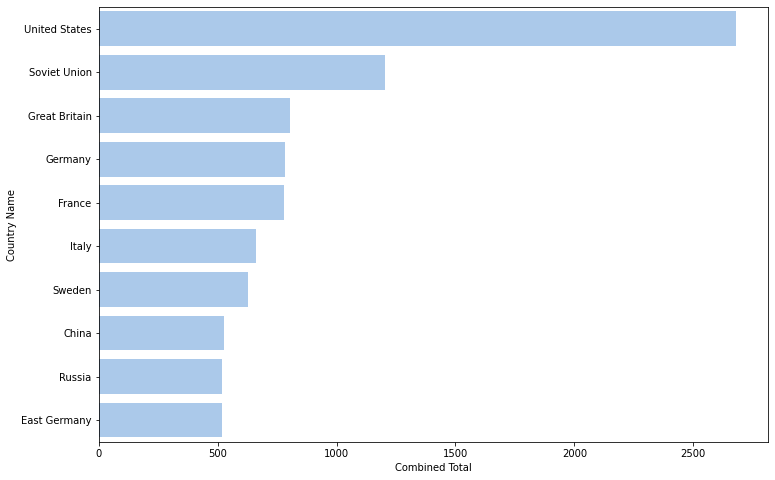

In [107]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Combined Total", y="Country Name", data=medals[:10],
            label="Total Medals", color="b");

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,
#            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
#sns.despine(left=True, bottom=True)

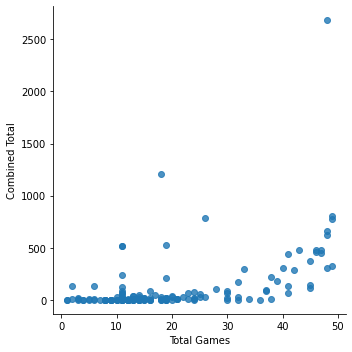

In [100]:
sns.lmplot(x='Total Games',y='Combined Total',data=medals, fit_reg=False)
plt.show()

Add data visualisation
- Separate Plots for 
    - Summer
    - Winter
    - Total
- Bubble Chart
- Correlation between athletes attending games and medals won
- Country breakdown between summer and winter
- Geographical visualization